In [ ]:
from sys import platform
import numpy
import pandas
import pandas as pd
import random
import sklearn
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from random import sample
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


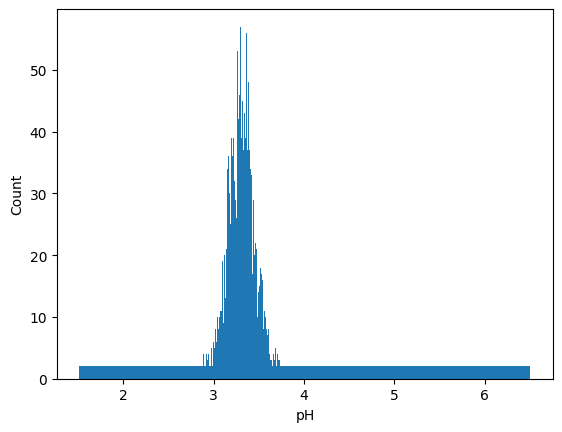

In [ ]:
data = pd.read_csv('/content/winequality-red.csv') #read file
print(data.quality.describe())
print(data.quality.value_counts())
#ph histogram
def plot_wine_ph_histogram(pH):
    unique_vals = data['pH'].sort_values().unique()
    plt.xlabel("pH")
    plt.ylabel("Count")
    plt.hist(pH.values, bins=np.append(unique_vals, 9), align='left')
plot_wine_ph_histogram(data['pH'])

**Quality Histogram**

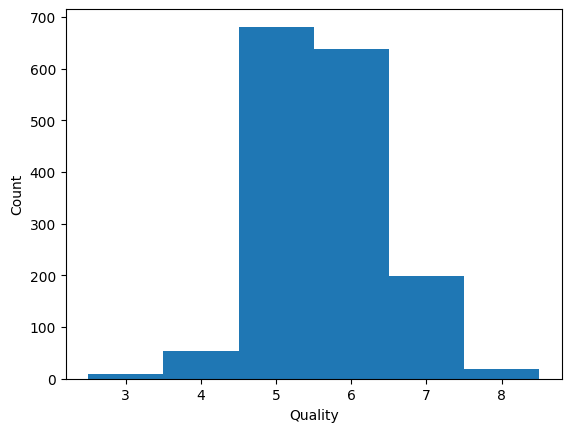

In [ ]:
def plot_wine_quality_histogram(quality): #quality histogram
    unique_vals = data['quality'].sort_values().unique()
    plt.xlabel("Quality")
    plt.ylabel("Count")
    plt.hist(quality.values, bins=np.append(unique_vals, 9), align='left')
plot_wine_quality_histogram(data['quality'])

**correlation matrix**

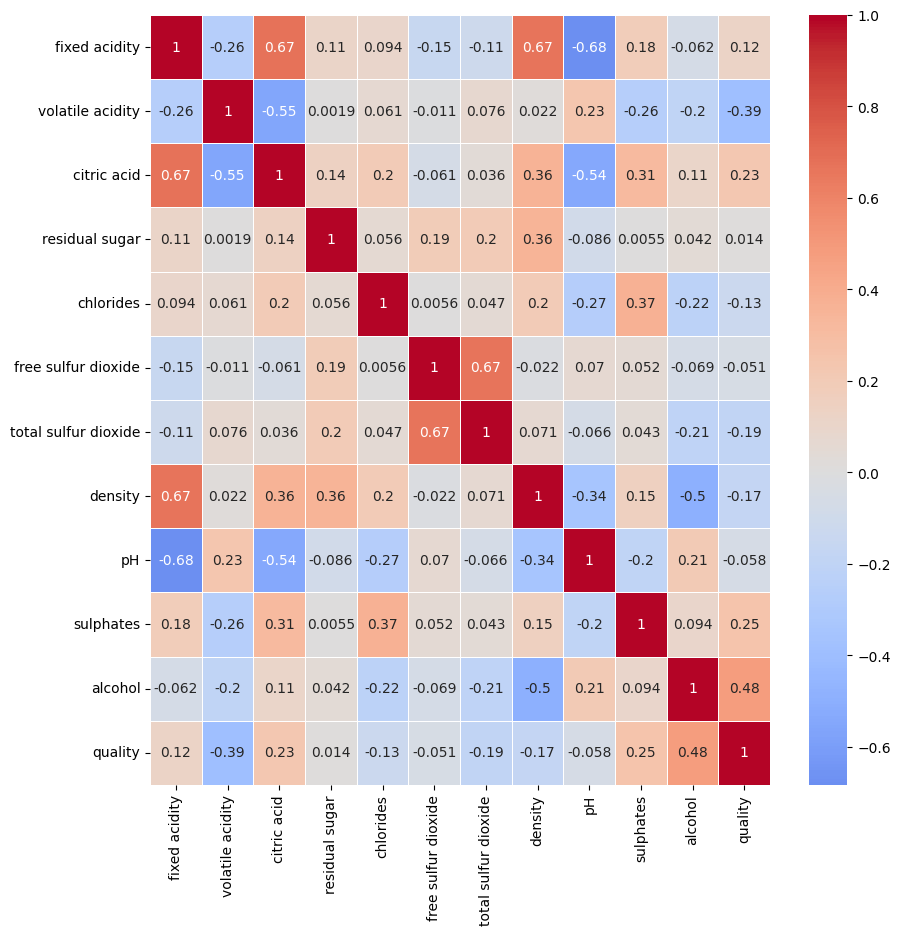

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,linewidth=0.5,center=0,cmap='coolwarm')
plt.savefig("quality-ph.png")
plt.show()

**Dataset Training**

In [ ]:
y = data.quality
x = data.drop('quality', axis=1)
X_train1, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
sth = X_train1.head()
sth1 = X_test.head()
sth

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
582,11.7,0.490,0.49,2.2,0.083,5.0,15.0,1.00000,3.19,0.43,9.2
626,8.8,0.600,0.29,2.2,0.098,5.0,15.0,0.99880,3.36,0.49,9.1
1030,7.1,0.590,0.00,2.1,0.091,9.0,14.0,0.99488,3.42,0.55,11.5
620,8.3,0.540,0.24,3.4,0.076,16.0,112.0,0.99760,3.27,0.61,9.4
490,9.3,0.775,0.27,2.8,0.078,24.0,56.0,0.99840,3.31,0.67,10.6


In [ ]:
tuned_parameters = [
    {
        'kernel': ['rbf'],
        'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
        'C': [1, 10, 100, 1000]
    },
    {
        'kernel': ['linear'],
        'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
        'C': [1, 10, 100, 1000]
    },
    {
        'kernel': ['sigmoid'],
        'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
        'C': [1, 10, 100, 1000]
    },
    # {
    #     'kernel': ['poly'],
    #     'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
    #     'C': [1, 10, 100, 1000],
    #     'degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    # }
]

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train1)
X_test = sc.transform(X_test)
classifier = SVC(random_state=5, kernel="rbf", C=10, gamma=0.1)
trained_model = classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
# clf = GridSearchCV(sklearn.svm.SVC(), tuned_parameters, scoring='accuracy', verbose=10)
# clf.fit(X_train, y_train)
# print(clf.best_estimator_)
# y_pred = clf.best_estimator_.predict(X_test)
# print(sklearn.metrics.classification_report(y_test, y_pred))
# print(clf.cv_results_)
# print(clf.best_estimator_)
# y_pred = clf.best_estimator_.predict(X_test)
# print(sklearn.metrics.classification_report(y_test, y_pred))
# print(clf.cv_results_)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


**Confusion matrix**

In [ ]:
cm_SVM = confusion_matrix(y_test, y_pred)
cm_SVM

array([[  0,   0,   1,   0,   0,   0],
       [  0,   0,  13,   0,   0,   0],
       [  0,   0, 164,   0,   0,   0],
       [  0,   0, 169,   0,   0,   0],
       [  0,   0,  48,   0,   0,   0],
       [  0,   0,   5,   0,   0,   0]])

**Precision score**

In [ ]:
precision = precision_score(y_test, y_pred, average="weighted")
precision

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.1681

**Recall score**

In [ ]:
recall = recall_score(y_test, y_pred, average="weighted")
recall

0.41

**Accuracy score**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
accuracy

41.0

In [ ]:
print(sklearn.metrics.classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         1
           4     0.0000    0.0000    0.0000        13
           5     0.4100    1.0000    0.5816       164
           6     0.0000    0.0000    0.0000       169
           7     0.0000    0.0000    0.0000        48
           8     0.0000    0.0000    0.0000         5

    accuracy                         0.4100       400
   macro avg     0.0683    0.1667    0.0969       400
weighted avg     0.1681    0.4100    0.2384       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
def buildSVM(Xtrain, Xtest, ytrain, ytest):
    classifier = SVC(random_state=5, kernel="rbf", C=10, gamma=0.1)
    trained_model = classifier.fit(Xtrain, ytrain)
    y_pred = classifier.predict(Xtest)
    print(sklearn.metrics.classification_report(ytest, y_pred, digits=4))

In [ ]:
erased = len(X_train) * 33 // 100
not_erased = len(X_train) - erased
nancol = random.sample(range(len(X_train)), erased) #παίρνω τυχαίο δείγμα του 33% των rows
for index in nancol:
    X_train[index][8] = None

**PH**

In [ ]:
no_ph = np.delete(X_train,[8], axis=1)
no_ph_test = np.delete(X_test,[8], axis=1)
buildSVM(no_ph,no_ph_test,y_train,y_test)

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         1
           4     0.0000    0.0000    0.0000        13
           5     0.4100    1.0000    0.5816       164
           6     0.0000    0.0000    0.0000       169
           7     0.0000    0.0000    0.0000        48
           8     0.0000    0.0000    0.0000         5

    accuracy                         0.4100       400
   macro avg     0.0683    0.1667    0.0969       400
weighted avg     0.1681    0.4100    0.2384       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
median = 0
for index in range(len(X_train)):
    if index not in nancol: #για κάθε γραμμή που δεν περιέχει nan
        median += X_train[index][8]

X_median = numpy.array(X_train)
median = median / not_erased
for index in range(len(X_median)):
    if index in nancol:
       X_median[index][8] = median

buildSVM(X_median, X_test, y_train, y_test)


              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         1
           4     0.0000    0.0000    0.0000        13
           5     0.4100    1.0000    0.5816       164
           6     0.0000    0.0000    0.0000       169
           7     0.0000    0.0000    0.0000        48
           8     0.0000    0.0000    0.0000         5

    accuracy                         0.4100       400
   macro avg     0.0683    0.1667    0.0969       400
weighted avg     0.1681    0.4100    0.2384       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Logistic Regression**

In [ ]:
y_ph = X_train[:, :8] #η στήλη με τα missing values

xg_train = []
yg_train = []
xg_test = []
yg_test = []
X_train2 = X_train1.values
np.set_printoptions(suppress=True)

X_train2[:,0] = X_train2[:,0]*10
X_train2[:,1] = X_train2[:,1]*1000
X_train2[:,2] = X_train2[:,2]*100
X_train2[:,3] = X_train2[:,3]*10
X_train2[:,4] = X_train2[:,4]*1000
X_train2[:,7] = X_train2[:,7]*100000
X_train2[:,8] = X_train2[:,8]*100
X_train2[:,9] = X_train2[:,9]*100
X_train2[:,10] = X_train2[:,10]*10
X_train2.astype(int)

no_ph = np.delete(X_train2,[8], axis=1) #χωρίς ph
for i in range(len(X_train2)):
    if i not in nancol:
        xg_train.append(no_ph[i])
        yg_train.append(X_train2[i][8])
    if i in nancol:
        xg_test.append(no_ph[i])
        yg_test.append(X_train2[i][8])
logistic_regression = LogisticRegression(max_iter=120000)
logistic_regression.fit(xg_train, yg_train)
y_pred = logistic_regression.predict(xg_test)

j=0
for i in range(len(X_train2)):
    if i in nancol:
       X_train2[i][8] = y_pred[j]
       j += 1

X_train2[:,0] = X_train2[:,0]/10
X_train2[:,1] = X_train2[:,1]/1000
X_train2[:,2] = X_train2[:,2]/100
X_train2[:,3] = X_train2[:,3]/10
X_train2[:,4] = X_train2[:,4]/1000
X_train2[:,7] = X_train2[:,7]/100000
X_train2[:,8] = X_train2[:,8]/100
X_train2[:,9] = X_train2[:,9]/100
X_train2[:,10] = X_train2[:,10]/10
X_train2 = sc.fit_transform(X_train2)

buildSVM(X_train2, X_test, y_train, y_test)

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         1
           4     0.0000    0.0000    0.0000        13
           5     0.4100    1.0000    0.5816       164
           6     0.0000    0.0000    0.0000       169
           7     0.0000    0.0000    0.0000        48
           8     0.0000    0.0000    0.0000         5

    accuracy                         0.4100       400
   macro avg     0.0683    0.1667    0.0969       400
weighted avg     0.1681    0.4100    0.2384       400



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**Elbow Method**

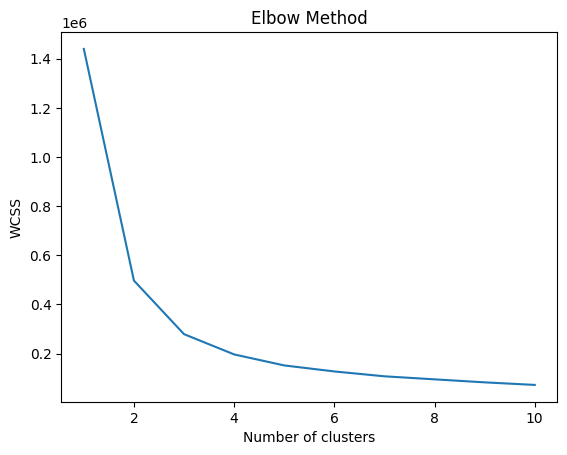

              precision    recall  f1-score   support

           3     0.0000    0.0000    0.0000         1
           4     0.4000    0.1538    0.2222        13
           5     0.6410    0.7622    0.6964       164
           6     0.5963    0.5680    0.5818       169
           7     0.5135    0.3958    0.4471        48
           8     0.0000    0.0000    0.0000         5

    accuracy                         0.6050       400
   macro avg     0.3585    0.3133    0.3246       400
weighted avg     0.5894    0.6050    0.5922       400



In [ ]:
no_ph1 = X_train1.drop('pH', axis=1)
X_kmeans = X_train1.values.tolist()
X_kplot = no_ph1.values.tolist()

pH=8
for index in nancol:
    X_kmeans[index][pH] = None

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_kplot)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.savefig("kmeans.png")
plt.show()



kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
centers = kmeans.fit(X_kplot).cluster_centers_

clusters = []
for i in range(len(centers)):
    clusters.append([])
for i in range(len(X_kplot)):
    dist = []
    for j in range(len(centers)):
        dist.append([np.linalg.norm(X_kplot[i] - centers[j]), j]) #υπολογισμός ευκλείδιας απόστασης
    dist.sort()
    clusters[dist[0][1]].append(i) #αναθέτουμε κάθε σημείο στο πλησιέστερο centroid


median = []
for i in range(len(clusters)):
    median.append(0)

clust_num = 0

#cluster
for cluster in clusters:
    not_erased = 0
    for index in cluster:
        if X_kmeans[index][pH] is not None:
            median[clust_num] += X_kmeans[index][pH]
            not_erased += 1
    if not_erased != 0:
        median[clust_num] /= not_erased
    for index in cluster:
        if X_kmeans[index][pH] is None:
            X_kmeans[index][pH] = median[clust_num]
    clust_num += 1

X_noph = sc.fit_transform(no_ph)
X_kmeans = sc.fit_transform(X_kmeans)
#SVM
buildSVM(X_kmeans, X_test, y_train, y_test)